## NLP use case

- Classifying whole sentences
- Classifying each word in a sentence (Named Entity Recognition)
- Answering a question given a context
- Text summarization
- Fill in the blanks
- Translating from one language to another

In [1]:
%%capture
!pip install transformers[sentencepiece]

In [2]:
from transformers import pipeline
import textwrap
wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)

## classifying whole sentences

In [3]:
sentence = 'The flights were on time both in Sydney and the connecting flight in Singapore. The organisation to cope with the COVID 19 restrictions while in transit was well planned and directions easy to follow, the plane was comfortable with a reasonable selection of in flight entertainment. Crew were pleasant and helpful.'
classifier = pipeline('text-classification', model='distilbert-base-uncased-finetuned-sst-2-english')
c = classifier(sentence)
print('\nSentence:')
print(wrapper.fill(sentence))
print(f"\nThis sentence is classified with a {c[0]['label']} sentiment")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]


Sentence:
The flights were on time both in Sydney and the connecting flight in Singapore.
The organisation to cope with the COVID 19 restrictions while in transit was
well planned and directions easy to follow, the plane was comfortable with a
reasonable selection of in flight entertainment. Crew were pleasant and helpful.

This sentence is classified with a POSITIVE sentiment


## Classifying each word in a sentence (Named Entity Recognition)

In [ ]:
sentence = "Singapore Airlines was the first airline to fly the A380. Chew Choon Seng was Singapore Airline's CEO at the time. Singapore Airlines flies to New York daily."
ner = pipeline('token-classification', model='dbmdz/bert-large-cased-finetuned-conll03-english', grouped_entities=True)
ners = ner(sentence)
print('\nSentence:')
print(wrapper.fill(sentence))
print('\n')
for n in ners:
  print(f"{n['word']} -> {n['entity_group']}")

## Answering a question given a context

In [ ]:
context = '''
Singapore Airlines was founded in 1947 and was originally known as Malayan Airways. It is the national airline of Singapore and is based at Singapore Changi Airport. 
From this hub, the airline flies to more than 60 destinations, with flights to Seoul, Tokyo and Melbourne among the most popular of its routes. 
It is particularly strong in Southeast Asian and Australian destinations (the so-called Kangaroo Route), but also flies to 6 different continents, covering 35 countries.
There are more than 100 planes in the Singapore Airlines fleet, most of which are Airbus aircraft plus a smaller amount of Boeings.
The company is known for frequently updating the aircraft in its fleet.'''


question = 'How many aircrafts does Singapore Airlines have?'

print('Text:')
print(wrapper.fill(context))
print('\nQuestion:')
print(question)

In [ ]:
from transformers import pipeline

qa = pipeline('question-answering', model='distilbert-base-cased-distilled-squad')

print('\nQuestion:')
print(question + '\n')
print('Answer:')
a = qa(context=context, question=question)
a['answer']

## Text summarization

In [ ]:
review = '''
Extremely unusual time to fly as we needed an exemption to fly out of Australia from the government. We obtained one as working in Tokyo for the year as teachers.
The check in procedure does take a lot longer as more paperwork and phone calls are needed to check if you are allowed to travel. The staff were excellent in explaining the procedure as they are working with very few numbers.
The flight had 40 people only, so lots of room and yes we had 3 seats each. The service of meals and beverages was done very quickly and efficiently.
Changi airport was like a ghost town with most shops closed and all passengers are walked/transported to a transit zone until your next flight is ready. You are then walked in single file or transported to your next flight, so very strange as at times their seemed be more workers in PPE gear than passengers.
The steps we went through at Narita were extensive, downloading apps, fill in paperwork and giving a saliva sample to test for covid 19. 
It took about 2 hours to get through the steps and we only sat down for maybe 10 minutes at the last stop to get back your covid results. 
The people involved were fantastic and we were lucky that we were numbers two and three in the initial first line up, but still over 2 hours it took so be aware. We knew we were quick as the people picking us up told us we were first out.'''

print('\nOriginal text:\n')
print(wrapper.fill(review))
summarize = pipeline('summarization', model='sshleifer/distilbart-cnn-12-6')
summarized_text = summarize(review)[0]['summary_text']
print('\nSummarized text:')
print(wrapper.fill(summarized_text))

## Fill in the blanks

In [7]:
sentence = 'It is the national <mask> of Singapore'
mask = pipeline('fill-mask', model='distilroberta-base')
masks = mask(sentence)
for m in masks:
  print(m['sequence'])

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

It is the national anthem of Singapore
It is the national capital of Singapore
It is the national pride of Singapore
It is the national treasure of Singapore
It is the national motto of Singapore


In [8]:
sentence = 'Singapore Airlines is the national <mask> of Singapore'
mask = pipeline('fill-mask', model='distilroberta-base')
masks = mask(sentence)
for m in masks:
  print(m['sequence'])

Singapore Airlines is the national airline of Singapore
Singapore Airlines is the national carrier of Singapore
Singapore Airlines is the national airport of Singapore
Singapore Airlines is the national airlines of Singapore
Singapore Airlines is the national capital of Singapore


## Translation (English to German)

In [ ]:
english = '''Singapore Airlines is my favourite airline'''

translator = pipeline('translation_en_to_de', model='t5-base')
german = translator(english)
print('\nEnglish:')
print(english)
print('\nGerman:')
print(german[0]['translation_text'])

## bias in bert

In [9]:
from transformers import pipeline

fill_mask = pipeline("fill-mask", model="bert-base-uncased")
results = fill_mask("The nurse needed a drink because [MASK] was tired after a long day's work at the hospital.")
results

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

[{'score': 0.9641985893249512,
  'token': 2016,
  'token_str': 'she',
  'sequence': "the nurse needed a drink because she was tired after a long day's work at the hospital."},
 {'score': 0.022492405027151108,
  'token': 2002,
  'token_str': 'he',
  'sequence': "the nurse needed a drink because he was tired after a long day's work at the hospital."},
 {'score': 0.001403257017955184,
  'token': 1045,
  'token_str': 'i',
  'sequence': "the nurse needed a drink because i was tired after a long day's work at the hospital."},
 {'score': 0.001286151586100459,
  'token': 2009,
  'token_str': 'it',
  'sequence': "the nurse needed a drink because it was tired after a long day's work at the hospital."},
 {'score': 0.0006937936414033175,
  'token': 3071,
  'token_str': 'everyone',
  'sequence': "the nurse needed a drink because everyone was tired after a long day's work at the hospital."}]

In [10]:
results = fill_mask("The doctor needed a drink because [MASK] was tired after a long day's work at the hospital.")
results

[{'score': 0.9312540292739868,
  'token': 2002,
  'token_str': 'he',
  'sequence': "the doctor needed a drink because he was tired after a long day's work at the hospital."},
 {'score': 0.0449102483689785,
  'token': 2016,
  'token_str': 'she',
  'sequence': "the doctor needed a drink because she was tired after a long day's work at the hospital."},
 {'score': 0.002265271497890353,
  'token': 1045,
  'token_str': 'i',
  'sequence': "the doctor needed a drink because i was tired after a long day's work at the hospital."},
 {'score': 0.0021235239692032337,
  'token': 2009,
  'token_str': 'it',
  'sequence': "the doctor needed a drink because it was tired after a long day's work at the hospital."},
 {'score': 0.0010061485227197409,
  'token': 3071,
  'token_str': 'everyone',
  'sequence': "the doctor needed a drink because everyone was tired after a long day's work at the hospital."}]

In [11]:
results = fill_mask("We had a meeting with our company receptionist and [MASK] was not happy.")
results

[{'score': 0.8818804025650024,
  'token': 2016,
  'token_str': 'she',
  'sequence': 'we had a meeting with our company receptionist and she was not happy.'},
 {'score': 0.02969827875494957,
  'token': 1045,
  'token_str': 'i',
  'sequence': 'we had a meeting with our company receptionist and i was not happy.'},
 {'score': 0.016220834106206894,
  'token': 2002,
  'token_str': 'he',
  'sequence': 'we had a meeting with our company receptionist and he was not happy.'},
 {'score': 0.008252743631601334,
  'token': 3071,
  'token_str': 'everyone',
  'sequence': 'we had a meeting with our company receptionist and everyone was not happy.'},
 {'score': 0.002857781480997801,
  'token': 2009,
  'token_str': 'it',
  'sequence': 'we had a meeting with our company receptionist and it was not happy.'}]

In [12]:
results = fill_mask("We had a meeting with our company president and [MASK] was not happy.")
results

[{'score': 0.9263392686843872,
  'token': 2002,
  'token_str': 'he',
  'sequence': 'we had a meeting with our company president and he was not happy.'},
 {'score': 0.056357014924287796,
  'token': 2016,
  'token_str': 'she',
  'sequence': 'we had a meeting with our company president and she was not happy.'},
 {'score': 0.003176403697580099,
  'token': 1045,
  'token_str': 'i',
  'sequence': 'we had a meeting with our company president and i was not happy.'},
 {'score': 0.0009640384814701974,
  'token': 2009,
  'token_str': 'it',
  'sequence': 'we had a meeting with our company president and it was not happy.'},
 {'score': 0.0006586540257558227,
  'token': 3071,
  'token_str': 'everyone',
  'sequence': 'we had a meeting with our company president and everyone was not happy.'}]

## IMDB dataset test

In [13]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /Users/karen/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [14]:
#print one example
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [17]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)

imdb_train_validation['validation'] = imdb_train_validation.pop('test')

imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [18]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [19]:
#remove the unsupervised part
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## overview of the new IMDB dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"I pulled down a VHS box from my vast collection - many unseen - and picked out a movie, based on the box art, I thought would be fun, and yes, bad. Prison had that 80s cheesy look all over that box. I sat down and watched, and lo! and behold!, fo...",1
1284,"You cannot deny that we have an affinity for speed. That's why movies like Fast and the Furious, Dhoom, Rempit get made to play to the satisfaction of audiences, especially local ones. We live on a tiny island, and I cannot fathom why, for the re...",0
408,"Admittedly, I didn't have high expectations of ""Corky Romano."" But then again, who did? However, I felt it deserved the benefit of the doubt. I had no high hopes of ""Joe Dirt"" either--another recent comedy starring an SNL cast member--and I ended...",0
1282,"Given how corny these movies are, you gotta figure that they must have had fun making them. The movie focuses on a house that strangely accommodates whomever lives there. The inhabitants were: author Charles Hillyer (Denholm Elliott (with hair!))...",1
1447,Really. Does any week go by that Oprah doesn't remind us that she was abused as child?<br /><br />She makes herself the focus of every interview.<br /><br />Oprah cannot resist commenting on the answer to every question she asks. She often interr...,0
1144,I have absolutely no knowledge of author Phillipa Pearce or any of her novels and if TOM`S MIDNIGHT GARDEN is typical of her work I probably would have had little interest in her books as a child . When I was a child I wasn`t really interested in...,0
1381,"This film can not even be said to be bad for it is sadly, just painfully mediocre. Lacking any real wit or imagination, a thin plot is stretched to the absolute limit and the `jokes' (which are predictable and threadbare) are spun out to such ino...",0
181,"If you really want to know how most of the actors and directors in the Hollywood scene ""made it"" to where they are, the vast majority will tell you (assuming they will tell) that a strange coincidence took place. They happened to meet the right p...",1
1183,"Oh man, what was Sam Mraovich thinking? What was anyone who was involved in this ""film"" thinking? Mraovich is the head of nearly everything of ""Ben and Arthur"": Director, writer, producer (also EXECUTIVE producer!), caster, lead star- you name it...",0
1103,"I can't believe it that was the worst movie i have ever seen in my life. i laughed a couple of times. ( probably because of how stupid it was ) If someone paid me to see that movie again i wouldn't. the plot was so horrible , it made no sense , a...",0


In [21]:
#replace special chars
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

'Despite positive reviews and screenings at the international festivals, this movie is not for everyone.The story is very similar to other movies, in which a teenage girl from the family of immigrants needs to overcome many common personal problems of her age, and also to struggle against the pressure of ethnic traditions in her family. She does that by choosing some kind of sport, and with the help of a local boy, that for some reason falls in love with her, she confronts her problems and wins.In Girlfight it\'s boxing, in Bend it like Beckham it\'s soccer, and now it\'s Kung Fu.But Fighter is much inferior product than these two, it was simply embarrassing to watch it. Semra Turan, the "actress" that playing the role of a teenage girl, maybe can do a lot of things, but one thing she can\'t do is to act. Her presence on the screen is anemic and clumsy, the dramatic situations, in which she tries to show some emotions, are dreadful, her body and facial language are of amateur actress, 

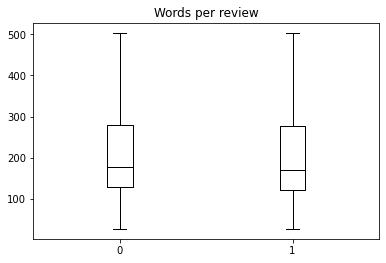

In [22]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [24]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]
imdb.reset_format()

### tokenizer

In [25]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [26]:
print(imdb_encoded['train'][0])

{'text': 'Despite positive reviews and screenings at the international festivals, this movie is not for everyone.<br /><br />The story is very similar to other movies, in which a teenage girl from the family of immigrants needs to overcome many common personal problems of her age, and also to struggle against the pressure of ethnic traditions in her family. She does that by choosing some kind of sport, and with the help of a local boy, that for some reason falls in love with her, she confronts her problems and wins.<br /><br />In Girlfight it\'s boxing, in Bend it like Beckham it\'s soccer, and now it\'s Kung Fu.<br /><br />But Fighter is much inferior product than these two, it was simply embarrassing to watch it. Semra Turan, the "actress" that playing the role of a teenage girl, maybe can do a lot of things, but one thing she can\'t do is to act. Her presence on the screen is anemic and clumsy, the dramatic situations, in which she tries to show some emotions, are dreadful, her body

In [27]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bia

In [28]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [29]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing_factor=0.0,
learning_rate=2e-05,
length_column_name=length,
load_best_model_at_end=False,
local_rank=-1,
log_level=40,
log_level_replica=-1,
log_on_each_node=True,
lo

In [32]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /Users/karen/.netrc


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/14 [00:00<?, ?it/s]

{'loss': 0.6966, 'learning_rate': 1.1428571428571429e-05, 'epoch': 0.86}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 0.7044218182563782, 'eval_runtime': 15.9444, 'eval_samples_per_second': 0.627, 'eval_steps_per_second': 0.125, 'epoch': 1.0}
{'loss': 0.6755, 'learning_rate': 2.8571428571428573e-06, 'epoch': 1.71}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 0.7186421751976013, 'eval_runtime': 6.0757, 'eval_samples_per_second': 1.646, 'eval_steps_per_second': 0.329, 'epoch': 2.0}
{'train_runtime': 486.8032, 'train_samples_per_second': 0.205, 'train_steps_per_second': 0.029, 'train_loss': 0.6790674754551479, 'epoch': 2.0}


In [33]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

  0%|          | 0/2 [00:00<?, ?it/s]

PredictionOutput(predictions=array([[ 0.08594816, -0.16521277],
       [ 0.05818872, -0.12268246],
       [ 0.07783253, -0.15271339],
       [ 0.07970534, -0.1489256 ],
       [ 0.09269353, -0.13750648],
       [ 0.10625673, -0.19395885],
       [ 0.10101943, -0.16549015],
       [ 0.10583945, -0.16423708],
       [ 0.08208867, -0.13910128],
       [ 0.06503416, -0.13956109]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.6492040753364563, 'test_runtime': 6.4475, 'test_samples_per_second': 1.551, 'test_steps_per_second': 0.31})